<a href="https://colab.research.google.com/github/DezinTI/Data-Science/blob/main/TrabPY_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📘 Explicação da Lógica do Trabalho
Este trabalho tem como objetivo avaliar a saída de um modelo de classificação binária com base na probabilidade da classe positiva. A proposta é criar um gráfico que represente a distribuição populacional por faixas de probabilidade, permitindo a definição de pontos de corte para tomada de decisão.
🔍 Etapas do processo:
- Simulação de dados
Geramos uma base genérica com probabilidades (prob_pos) e rótulos reais (target) para simular a saída de um modelo binário.
- Distribuição por faixas
Dividimos os dados em faixas de probabilidade (ex: 0–10%, 10–20%, etc.) usando um step customizável. Calculamos o percentual populacional em cada faixa.
- Visualização com histogramas
Criamos um gráfico com barras azuis para a população geral e vermelhas para os casos positivos, lado a lado, facilitando a leitura visual.
- Definição dos pontos de corte
Estabelecemos dois limites:
- Abaixo do corte inferior → classificado como negativo
- Acima do corte superior → classificado como positivo
- Entre os cortes → enviado para análise manual
- Avaliação do modelo
Calculamos métricas como acurácia, recall e precisão para entender os erros e justificar os cortes. O objetivo é minimizar a perda de casos positivos e evitar falsos negativos.

🎯 Conclusão
O gráfico e as métricas permitem visualizar o desempenho do modelo e tomar decisões mais seguras. A estrutura é genérica, podendo ser aplicada a qualquer base de dados binária, com qualquer modelo, e adaptada conforme o contexto (ex: spam, fraude, sentimento).


### Importando as bibliotecas:

In [ ]:
import pandas as pd #  Biblioteca Pandas
import numpy as np # Biblioteca com calculos, para gerar dados "Random"
import matplotlib.pyplot as plt # Biblioteca para criar gráficos customizaveis

Criando os dados "random"

In [ ]:
# Utilizando a biblioteca "NUMPY", para gerar dados random

np.random.rand(1000)  # sem seed → resultados diferentes a cada execução

# ou com seed

# np.random.seed(123) resultados iguais a cada execução

df= pd.DataFrame({
    'prob_pos': np.random.rand(1000), #probabilidade positiva

    'target' : np.random.choice([0,1], size=1000, p=[0.7, 0.3]) # retorno Real
})

df.head()

,prob_pos,target
0,0.648257,0
1,0.172386,0
2,0.872395,1
3,0.613116,1
4,0.157204,0


Configurando a planilha

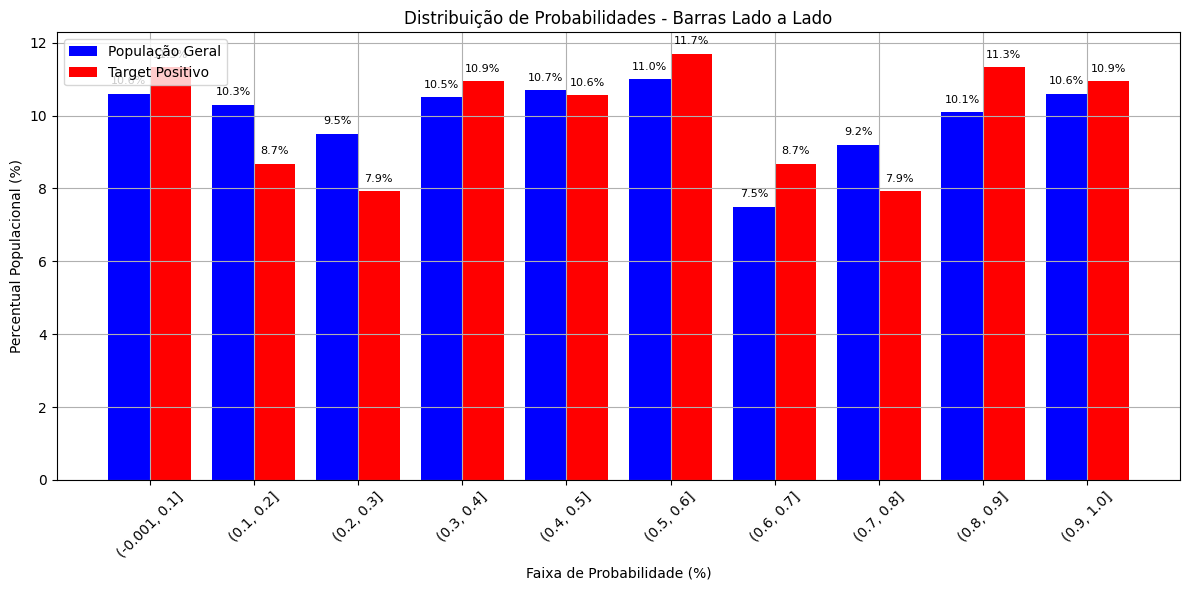

In [ ]:
# Definindo o step
step = 0.1
bins = np.arange(0, 1 + step, step)
df['bin'] = pd.cut(df['prob_pos'], bins=bins, include_lowest=True)

# Calculando os percentuais
pop_total = df['bin'].value_counts(normalize=True).sort_index() * 100
pop_pos = df[df['target'] == 1]['bin'].value_counts(normalize=True).sort_index() * 100

# Garantindo que os índices estejam alinhados
labels = pop_total.index.astype(str)
x = np.arange(len(labels))
width = 0.4

# Plotando gráfico com valores
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width/2, pop_total.values, width=width, color='blue', label='População Geral')
bars2 = plt.bar(x + width/2, pop_pos.values, width=width, color='red', label='Target Positivo')

# Adicionando os valores em cima das barras
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

plt.xticks(x, labels, rotation=45)
plt.xlabel('Faixa de Probabilidade (%)')
plt.ylabel('Percentual Populacional (%)')
plt.title('Distribuição de Probabilidades - Barras Lado a Lado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Definição dos Pontos de cortes

In [ ]:
# Definindo os pontos de corte
corte_neg = 0.5
corte_pos = 0.9

# Criando coluna de predição baseada nos cortes
def classificar(prob):
    if prob <= corte_neg:
        return 0 #classe negativa <- força a retornar negativo
    elif prob >= corte_pos:
        return 1 #classe positiva <- força a retornar positivo
    else:
        return -1  # análise manual

df['pred'] = df['prob_pos'].apply(classificar)

# Calculando métricas
total = len(df)
acertos = (df['pred'] == df['target']).sum()
acuracia = acertos / total

# Apenas onde houve decisão (sem análise manual)
df_decidido = df[df['pred'] != -1]
acuracia_decidida = (df_decidido['pred'] == df_decidido['target']).mean()

# Recall e precisão para classe positiva
verdadeiros_positivos = ((df['pred'] == 1) & (df['target'] == 1)).sum()
falsos_negativos = ((df['pred'] == 0) & (df['target'] == 1)).sum()
falsos_positivos = ((df['pred'] == 1) & (df['target'] == 0)).sum()

recall = verdadeiros_positivos / (verdadeiros_positivos + falsos_negativos)
precision = verdadeiros_positivos / (verdadeiros_positivos + falsos_positivos)

# Exibindo os resultados
print(f"Acurácia geral: {acuracia:.2f}")
print(f"Acurácia onde houve decisão: {acuracia_decidida:.2f}")
print(f"Recall (sensibilidade): {recall:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Casos enviados para análise manual: {(df['pred'] == -1).sum()} de {total}")

Acurácia geral: 0.39
Acurácia onde houve decisão: 0.64
Recall (sensibilidade): 0.19
Precisão: 0.36
Casos enviados para análise manual: 397 de 1000


Célula 1: Função avaliar_cortes

In [ ]:
def avaliar_cortes(df, corte_neg=0.3, corte_pos=0.7):
    # Aplica os cortes
    def classificar(prob):
        if prob <= corte_neg:
            return 0
        elif prob >= corte_pos:
            return 1
        else:
            return -1  # análise manual

    df['pred'] = df['prob_pos'].apply(classificar)

    # Métricas
    total = len(df)
    acertos = (df['pred'] == df['target']).sum()
    acuracia = acertos / total

    df_decidido = df[df['pred'] != -1]
    acuracia_decidida = (df_decidido['pred'] == df_decidido['target']).mean()

    vp = ((df['pred'] == 1) & (df['target'] == 1)).sum()
    fn = ((df['pred'] == 0) & (df['target'] == 1)).sum()
    fp = ((df['pred'] == 1) & (df['target'] == 0)).sum()

    recall = vp / (vp + fn) if (vp + fn) > 0 else 0
    precisao = vp / (vp + fp) if (vp + fp) > 0 else 0
    analise_manual = (df['pred'] == -1).sum()

    # Exibe os resultados
    print(f"🔹 Corte Negativo: {corte_neg:.2f} | Corte Positivo: {corte_pos:.2f}")
    print(f"Acurácia geral: {acuracia:.2f}")
    print(f"Acurácia onde houve decisão: {acuracia_decidida:.2f}")
    print(f"Recall (sensibilidade): {recall:.2f}")
    print(f"Precisão: {precisao:.2f}")
    print(f"Casos enviados para análise manual: {analise_manual} de {total}")

testar vários cortes automaticamente
Crie outra célula e cole este código para testar vários cortes e ver qual funciona melhor:

🧠 Resultado
Esse bloco vai mostrar:
- Como as métricas mudam com diferentes cortes
- Qual combinação tem melhor recall, precisão ou acurácia
- Quantos casos vão pra análise manual em cada cenário



In [ ]:
# Testando vários pontos de corte
for corte_neg in [0.3, 0.4, 0.5]:
    for corte_pos in [0.7, 0.8, 0.9]:
        avaliar_cortes(df, corte_neg=corte_neg, corte_pos=corte_pos)
        print("-" * 50)

🔹 Corte Negativo: 0.30 | Corte Positivo: 0.70
Acurácia geral: 0.31
Acurácia onde houve decisão: 0.51
Recall (sensibilidade): 0.52
Precisão: 0.27
Casos enviados para análise manual: 397 de 1000
--------------------------------------------------
🔹 Corte Negativo: 0.30 | Corte Positivo: 0.80
Acurácia geral: 0.29
Acurácia onde houve decisão: 0.57
Recall (sensibilidade): 0.44
Precisão: 0.29
Casos enviados para análise manual: 489 de 1000
--------------------------------------------------
🔹 Corte Negativo: 0.30 | Corte Positivo: 0.90
Acurácia geral: 0.26
Acurácia onde houve decisão: 0.63
Recall (sensibilidade): 0.28
Precisão: 0.27
Casos enviados para análise manual: 590 de 1000
--------------------------------------------------
🔹 Corte Negativo: 0.40 | Corte Positivo: 0.70
Acurácia geral: 0.39
Acurácia onde houve decisão: 0.55
Recall (sensibilidade): 0.44
Precisão: 0.27
Casos enviados para análise manual: 292 de 1000
--------------------------------------------------
🔹 Corte Negativo: 0.40 |